In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
fmri = sns.load_dataset("fmri")

In [29]:
acc1, acc3 = pd.read_csv('fastval_acc_1.csv'), pd.read_csv('fastval_acc_3.csv')

In [38]:
acc1.rename(index=str, columns={"Step": "Step_acc1", 'Value': 'Value_acc1'}, inplace=True)
acc3.rename(index=str, columns={"Step": "Step_acc3", 'Value': 'Value_acc3'}, inplace=True)
del acc3['Wall time']

In [39]:
df = pd.concat([acc1, acc3], axis=1)

In [10]:
df.columns

Index(['Wall time', 'Step', 'Value'], dtype='object')

In [40]:
df

,Wall time,Step_acc1,Value_acc1,Step_acc3,Value_acc3
0,1.556912e+09,0,32.200001,0,87.300003
1,1.556913e+09,1,40.800003,1,91.400002
2,1.556913e+09,2,43.100002,2,93.900002
3,1.556914e+09,3,47.100002,3,94.000008
4,1.556915e+09,4,49.500004,4,94.000008
5,1.556916e+09,5,47.500004,5,94.500008
6,1.556916e+09,6,52.300003,6,94.300003
7,1.556917e+09,7,48.700001,7,94.300003
8,1.556918e+09,8,51.500004,8,94.500008
9,1.556918e+09,9,51.000004,9,95.500008


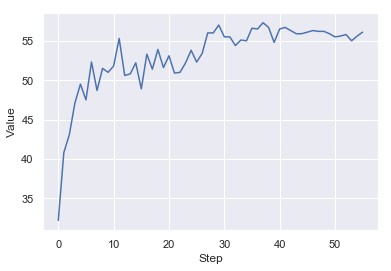

In [12]:
sns.set()
ax = sns.lineplot(x="Step", y="Value", data=df)

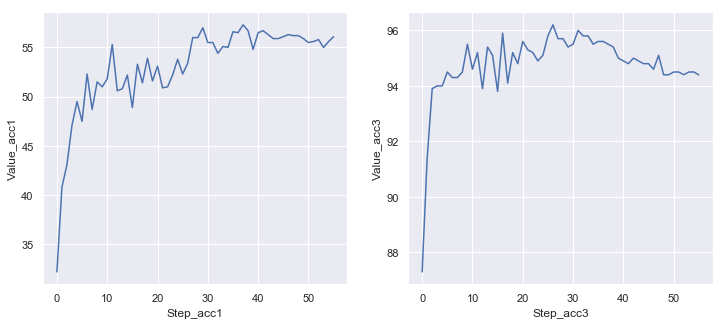

In [47]:
fig, axs = plt.subplots(ncols=2)
fig.set_size_inches(12, 5)
ax = sns.lineplot(x="Step_acc1", y="Value_acc1", data=df, ax=axs[0])
ax = sns.lineplot(x="Step_acc3", y="Value_acc3", data=df, ax=axs[1])

In [ ]:
ax = sns.lineplot(x="Step", y="Value", data=df)

In [ ]:
import torchvision.transforms.functional as TF
import torch

from timeit import default_timer

from utils.torchbp import Classifier
from train_emotion_model import create_model

emotion_model_path = './models/emotion_model_new.pth'

def load_model():
    model = create_model()
    model.load_state_dict(torch.load(emotion_model_path))
    return model

def prepare_face_image(face_image):
    face_image = TF.to_tensor(face_image)
    face_image = TF.normalize(face_image, [0.5] * 3, [0.5] * 3, inplace=True)
    return face_image.unsqueeze(0)

emotion_labels = {0: 'Neutral', 1: 'Happiness', 2: 'Sadness', 3: 'Surprise', 4: 'Fear', 5: 'Disgust',
                      6: 'Anger', 7: 'Contempt', 8: 'None', 9: 'Uncertain', 10: 'No-face'}

emotion_classifier = Classifier(load_model(), len(emotion_labels))

